<a href="https://colab.research.google.com/github/FatimaMHelmy/FixedSolutions/blob/main/NoteBook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Dependencies 

In [ ]:
! pip install dataprep  # for data report 

In [ ]:
! pip install phik # for correlation 

## Objective:
 Discuss the effect of advertisement  in sales in the company

Companies are selling a lot of products, but customers are not interacting with their advertising in a meaningful way.

# Imoprt Important Libraries

In [52]:
import pandas as pd 
import numpy as np
# for visualization 
import matplotlib.pyplot as plt
import seaborn as sns
# for the report 
from dataprep.datasets import load_dataset
from dataprep.eda import create_report
# For model
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

# Step 1: Data Loading

In [4]:
data = (
    pd.read_csv("/content/drive/MyDrive/full_gen_data.csv")
    .assign(
        retailweek = lambda x : pd.to_datetime(x.retailweek)
    )



)


In [53]:
data.columns

Index(['country', 'article', 'sales', 'regular_price', 'current_price',
       'ratio', 'retailweek', 'promo1', 'promo2', 'customer_id', 'article.1',
       'productgroup', 'category', 'cost', 'style', 'sizes', 'gender',
       'rgb_r_main_col', 'rgb_g_main_col', 'rgb_b_main_col', 'rgb_r_sec_col',
       'rgb_g_sec_col', 'rgb_b_sec_col', 'label'],
      dtype='object')

In [51]:
data.nunique()

country              3
article            477
sales              476
regular_price      123
current_price      141
ratio             2722
retailweek         123
promo1               2
promo2               2
customer_id       4549
article.1           10
productgroup         4
category             6
cost                10
style                3
sizes                2
gender               4
rgb_r_main_col       7
rgb_g_main_col      10
rgb_b_main_col      10
rgb_r_sec_col        3
rgb_g_sec_col        3
rgb_b_sec_col        3
label                2
dtype: int64

In [48]:
data.head(20).T

0                    1   \
country                     Germany              Germany   
article                      YN8639               YN8639   
sales                            28                   28   
regular_price                  5.95                 5.95   
current_price                  3.95                 3.95   
ratio                      0.663866             0.663866   
retailweek               2016-03-27           2016-03-27   
promo1                            0                    0   
promo2                            0                    0   
customer_id                  1003.0               1003.0   
article.1                    OC6355               AP5568   
productgroup                  SHOES               SHORTS   
category                   TRAINING             TRAINING   
cost                          13.29                 2.29   
style                          slim              regular   
sizes           xxs,xs,s,m,l,xl,xxl  xxs,xs,s,m,l,xl,xxl   
gender                        women                women   
rgb_r_main_col                  205                  188   
rgb_g_main_col                  104                  238   
rgb_b_main_col                   57                  104   
rgb_r_sec_col                   255                  255   
rgb_g_sec_col                   187                  187   
rgb_b_sec_col                   255                  255   
label                             0                    0   

                                  2                    3   \
country                      Germany              Germany   
article                       YN8639               YN8639   
sales                             28                   28   
regular_price                   5.95                 5.95   
current_price                   3.95                 3.95   
ratio                       0.663866             0.663866   
retailweek                2016-03-27           2016-03-27   
promo1                             0                    0   
promo2                             0                    0   
customer_id                   1003.0               1003.0   
article.1                     CB8861               LI3529   
productgroup    HARDWARE ACCESSORIES                SHOES   
category                        GOLF              RUNNING   
cost                             1.7                  9.0   
style                        regular              regular   
sizes            xxs,xs,s,m,l,xl,xxl  xxs,xs,s,m,l,xl,xxl   
gender                         women                 kids   
rgb_r_main_col                   205                  205   
rgb_g_main_col                   173                  140   
rgb_b_main_col                     0                  149   
rgb_r_sec_col                    255                  164   
rgb_g_sec_col                    187                  211   
rgb_b_sec_col                    255                  238   
label                              0                    0   

                                 4                    5                 6   \
country                     Germany              Germany           Germany   
article                      YN8639               YN8639            YN8639   
sales                            28                   28                28   
regular_price                  5.95                 5.95              5.95   
current_price                  3.95                 3.95              3.95   
ratio                      0.663866             0.663866          0.663866   
retailweek               2016-03-27           2016-03-27        2016-03-27   
promo1                            0                    0                 0   
promo2                            0                    0                 0   
customer_id                  1003.0               1003.0            1003.0   
article.1                    GG8661               TX1463            PC6383   
productgroup                  SHOES          SWEATSHIRTS             S

The plot will not show in a notebook environment, please try 'show_browser' if you want to open it in browser



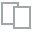
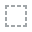
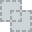
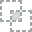
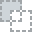
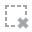
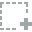
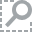
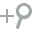
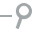
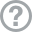
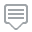
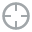
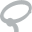
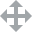
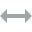
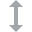
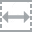
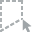
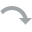
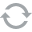
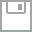
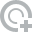
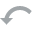
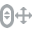
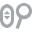
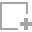
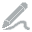
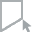
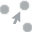
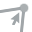
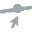

In [54]:
create_report(data).show()

## from the report above it's obvious that:

- data  doesn't have missing values 
- data  doesn't have Duplicates 
- There are three skewed features 
    - sales is skewed	Skewed
    - ratio is skewed	Skewed
    - rgb_g_main_col

- Some features are unbalanced     

# Step2:Feature Engineering

In [11]:
# Get copy from orginal data 
df = data.copy()
df.columns

Index(['country', 'article', 'sales', 'regular_price', 'current_price',
       'ratio', 'retailweek', 'promo1', 'promo2', 'customer_id', 'article.1',
       'productgroup', 'category', 'cost', 'style', 'sizes', 'gender',
       'rgb_r_main_col', 'rgb_g_main_col', 'rgb_b_main_col', 'rgb_r_sec_col',
       'rgb_g_sec_col', 'rgb_b_sec_col', 'label'],
      dtype='object')

In [12]:
# Aggregate color features to create new features
color_columns = ['rgb_r_main_col', 'rgb_g_main_col', 'rgb_b_main_col',
                 'rgb_r_sec_col', 'rgb_g_sec_col', 'rgb_b_sec_col']
df['main_color_intensity_sum'] = df[color_columns[:3]].sum(axis=1)
df['main_color_intensity_sum'] = df[color_columns[3:]].sum(axis=1)


# Extract information from 'sizes' feature
df['num_sizes_available'] = df['sizes'].str.split(',').apply(lambda x: len(x))

# Calculate derived feature: profit margin
df['profit_margin'] = df['current_price'] - df['cost']

# Calculate Discount
df['discount_ratio'] = 1 - data['ratio']

# Extract date and time features from 'retailweek'
df['retailweek'] = pd.to_datetime(df['retailweek'])
df['day_of_week'] = df['retailweek'].dt.dayofweek
df['month'] = df['retailweek'].dt.month
df['year'] = df['retailweek'].dt.year



In [14]:
from math import ceil

def week_of_month(dt):
    """ Returns the week of the month for the specified date.
    """

    first_day = dt.replace(day=1)

    dom = dt.day
    adjusted_dom = dom + first_day.weekday()

    return int(ceil(adjusted_dom/7.0))
df['retailweek_num'] = df["retailweek"].apply(week_of_month)

In [15]:
# Don't know what is the different 
data[["article.1","article"]]

article.1 article
0        OC6355  YN8639
1        AP5568  YN8639
2        CB8861  YN8639
3        LI3529  YN8639
4        GG8661  YN8639
...         ...     ...
99995    TX1463  PW6278
99996    PC6383  PW6278
99997    VT7698  PW6278
99998    FG2965  PW6278
99999    AC7347  PW6278

[100000 rows x 2 columns]

In [16]:
# Drop the unwanted features
features_to_drop = [ "customer_id","article.1","article",'retailweek','sizes','ratio','rgb_r_main_col', 'rgb_g_main_col', 'rgb_b_main_col',
                 'rgb_r_sec_col', 'rgb_g_sec_col', 'rgb_b_sec_col']
df_nor = df.drop(features_to_drop, axis=1)

# Statistical Analysis 

interval columns not set, guessing: ['sales', 'regular_price', 'current_price', 'promo1', 'promo2', 'cost', 'label', 'main_color_intensity_sum', 'num_sizes_available', 'profit_margin', 'discount_ratio', 'day_of_week', 'month', 'year', 'retailweek_num']


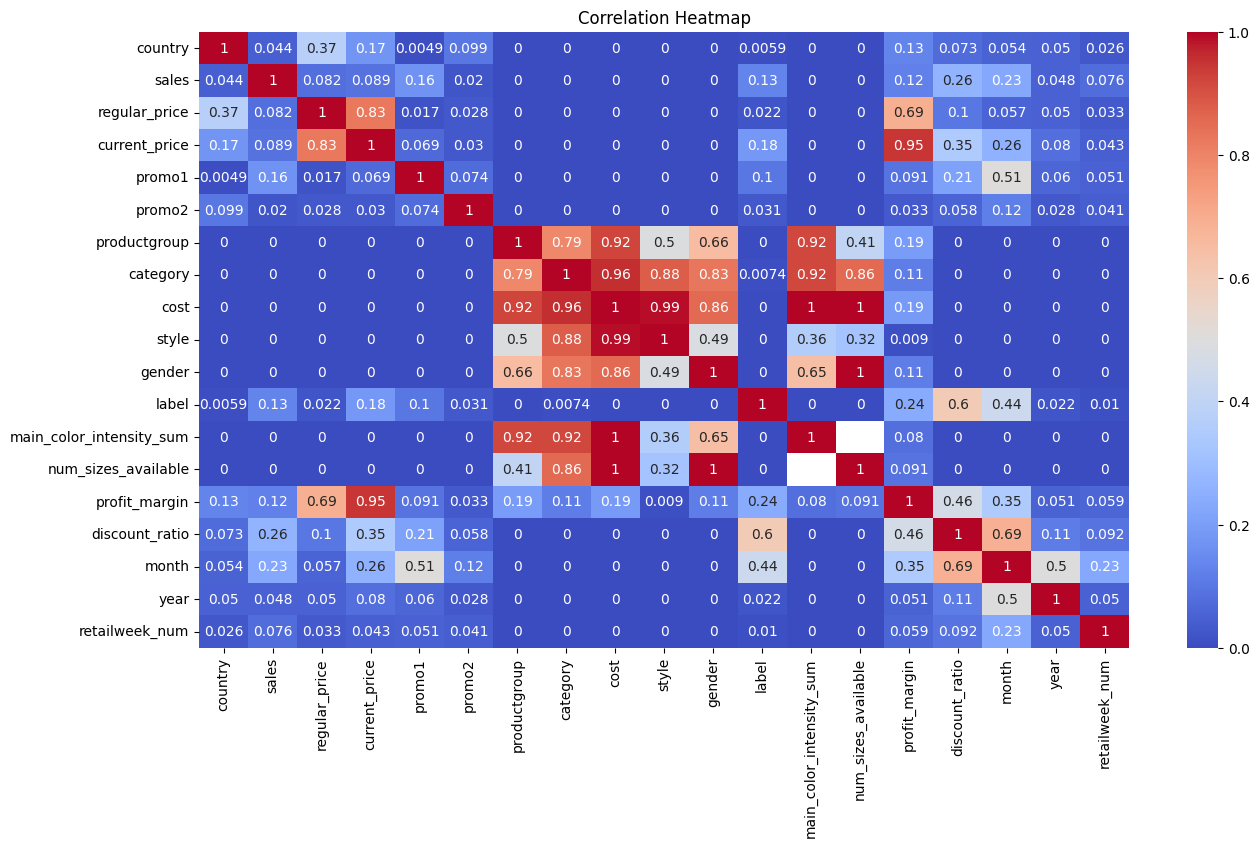

In [17]:
# Calculate correlation coefficients
# correlation_matrix = data.corr()
# print(correlation_matrix)
from phik import phik_matrix
corr_matrix = phik_matrix(df_nor)
# Set the figure size
plt.figure(figsize=(15, 8))

# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set plot title
plt.title('Correlation Heatmap')

# Display the plot
plt.show()



## Promos Vs Label 

### Promo1

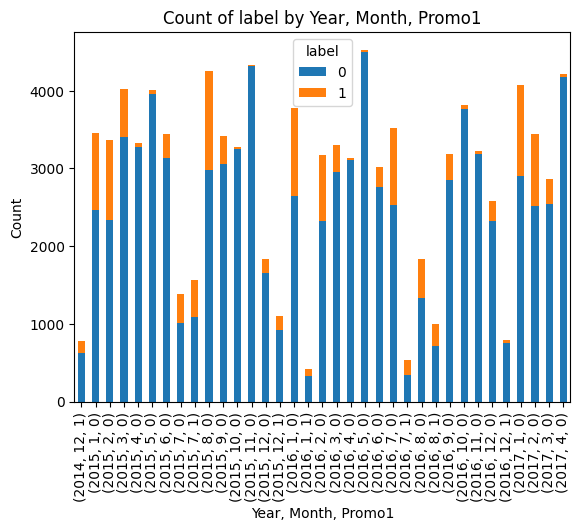

In [91]:
# Perform the groupby operation and calculate the value counts
grouped_counts = df_nor.groupby(['year', 'month', 'promo1'])['label'].value_counts()

# Reset the index to make the groupby results accessible as columns
grouped_counts = grouped_counts.reset_index(name='count')

# Create a pivot table to reshape the data for plotting
pivot_table = grouped_counts.pivot_table(index=['year', 'month', 'promo1'], columns='label', values='count', fill_value=0)

# Plot the bar graph
pivot_table.plot(kind='bar', stacked=True)

# Set the labels and title
plt.xlabel('Year, Month, Promo1')
plt.ylabel('Count')
plt.title('Count of label by Year, Month, Promo1')

# Display the plot
plt.show()


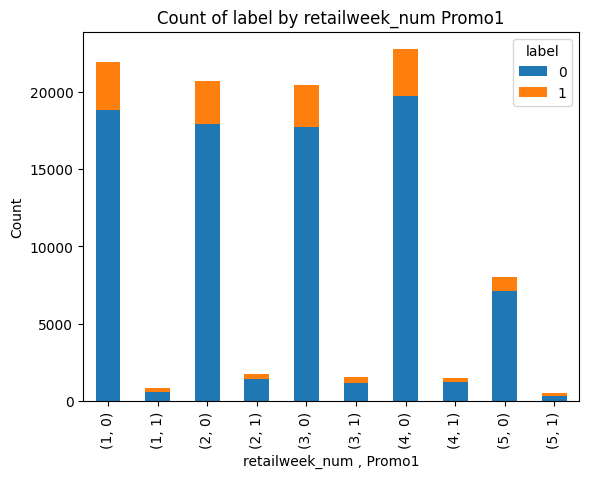

In [92]:
# Perform the groupby operation and calculate the value counts
grouped_counts = df_nor.groupby(['retailweek_num', 'promo1'])['label'].value_counts()

# Reset the index to make the groupby results accessible as columns
grouped_counts = grouped_counts.reset_index(name='count')

# Create a pivot table to reshape the data for plotting
pivot_table = grouped_counts.pivot_table(index=['retailweek_num', 'promo1'], columns='label', values='count', fill_value=0)

# Plot the bar graph
pivot_table.plot(kind='bar', stacked=True)

# Set the labels and title
plt.xlabel('retailweek_num , Promo1')
plt.ylabel('Count')
plt.title('Count of label by retailweek_num Promo1')

# Display the plot
plt.show()


- From the 2 figures  Promo1 number is soo low so it's effect not recognized  


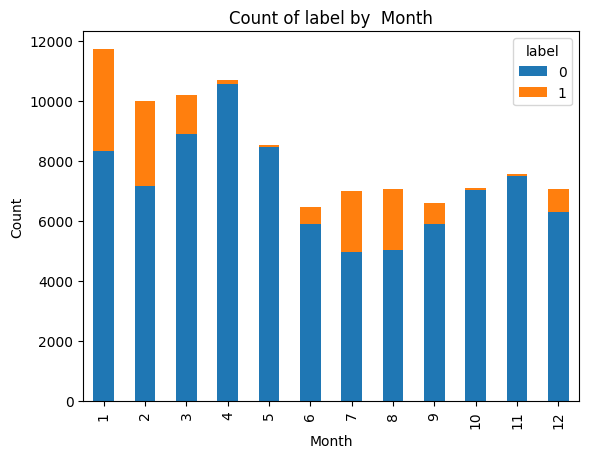

In [66]:
# Assuming 'df_nor' is the DataFrame containing the relevant columns

# Perform the groupby operation and calculate the value counts
grouped_counts = df_nor.groupby([ 'month'])['label'].value_counts()

# Reset the index to make the groupby results accessible as columns
grouped_counts = grouped_counts.reset_index(name='count')

# Create a pivot table to reshape the data for plotting
pivot_table = grouped_counts.pivot_table(index=['month'], columns='label', values='count', fill_value=0)

# Plot the bar graph
pivot_table.plot(kind='bar', stacked=True)

# Set the labels and title
plt.xlabel( 'Month')
plt.ylabel('Count')
plt.title('Count of label by  Month')

# Display the plot
plt.show()


FROM THE FIGURES ABOVE 
- months 4,5,10,11 have about no accepted offers 

### PROMO_2 

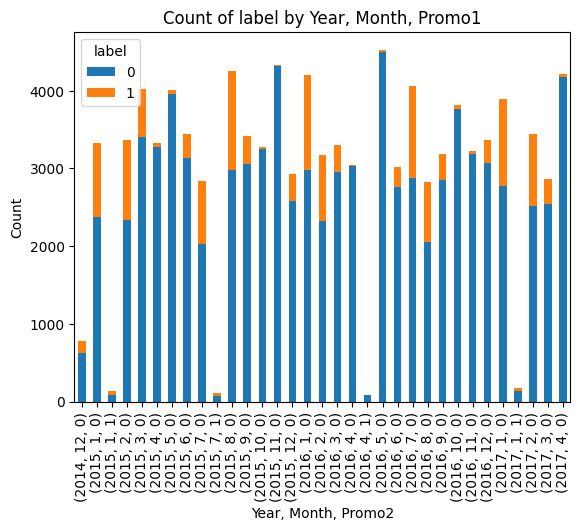

In [68]:


# Assuming 'df_nor' is the DataFrame containing the relevant columns

# Perform the groupby operation and calculate the value counts
grouped_counts = df_nor.groupby(['year', 'month', 'promo2'])['label'].value_counts()

# Reset the index to make the groupby results accessible as columns
grouped_counts = grouped_counts.reset_index(name='count')

# Create a pivot table to reshape the data for plotting
pivot_table = grouped_counts.pivot_table(index=['year', 'month', 'promo2'], columns='label', values='count', fill_value=0)

# Plot the bar graph
pivot_table.plot(kind='bar', stacked=True)

# Set the labels and title
plt.xlabel('Year, Month, Promo2')
plt.ylabel('Count')
plt.title('Count of label by Year, Month, Promo1')

# Display the plot
plt.show()


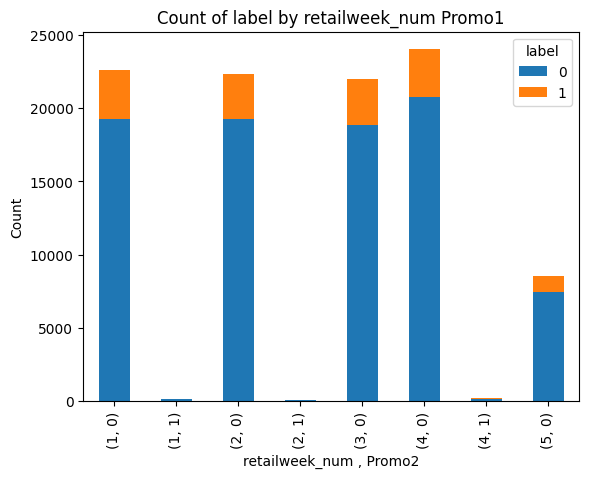

In [94]:


# Assuming 'df_nor' is the DataFrame containing the relevant columns

# Perform the groupby operation and calculate the value counts
grouped_counts = df_nor.groupby(['retailweek_num', 'promo2'])['label'].value_counts()

# Reset the index to make the groupby results accessible as columns
grouped_counts = grouped_counts.reset_index(name='count')

# Create a pivot table to reshape the data for plotting
pivot_table = grouped_counts.pivot_table(index=['retailweek_num', 'promo2'], columns='label', values='count', fill_value=0)

# Plot the bar graph
pivot_table.plot(kind='bar', stacked=True)

# Set the labels and title
plt.xlabel('retailweek_num , Promo2')
plt.ylabel('Count')
plt.title('Count of label by retailweek_num Promo1')

# Display the plot
plt.show()


- The same as promo1 

In [116]:
df_nor.groupby(['country', 'promo1', 'promo2'], as_index=False).label.sum()


country  promo1  promo2  label
0  Austria       0       0   4525
1  Austria       1       0    519
2   France       0       0   1766
3   France       0       1     75
4   France       1       0    164
5   France       1       1     42
6  Germany       0       0   6165
7  Germany       1       0    672


This data frame reveals that the impact of promotions on the target variable cannot be accurately recognized or determined due to The low amount of promos. The figures shown above indicate that the presence of promotions may have influenced the target variable, making it challenging to isolate and assess their true effect.

### Offers vs Gender

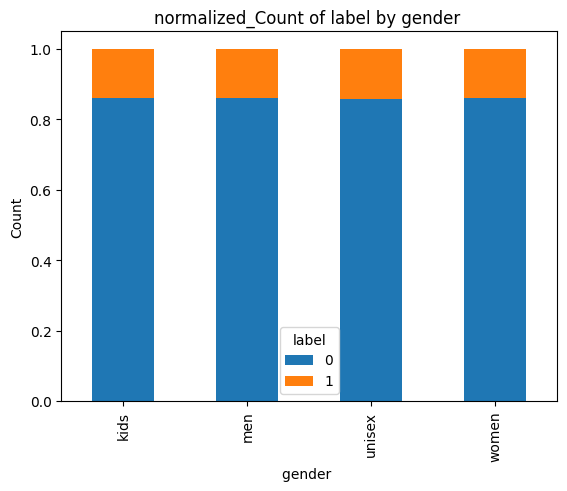

In [98]:
# Perform the groupby operation and calculate the value counts
grouped_counts = df_nor.groupby('gender')['label'].value_counts(normalize=True)

# Reset the index to make the groupby results accessible as columns
grouped_counts = grouped_counts.reset_index(name='count')

# Create a pivot table to reshape the data for plotting
pivot_table = grouped_counts.pivot_table(index=['gender'], columns='label', values='count', fill_value=0)

# Plot the bar graph
pivot_table.plot(kind='bar', stacked=True)

# Set the labels and title
plt.xlabel('gender ')
plt.ylabel('Count')
plt.title('normalized_Count of label by gender ')

# Display the plot
plt.show()



Despite the gender bias towards women in the dataset, the analysis shows that the offer acceptance ratio is the same for both gender types. This suggests that gender does not significantly impact the likelihood of accepting the offer.


## offers vs size 

In [100]:
df_nor['num_sizes_available'].nunique()

2

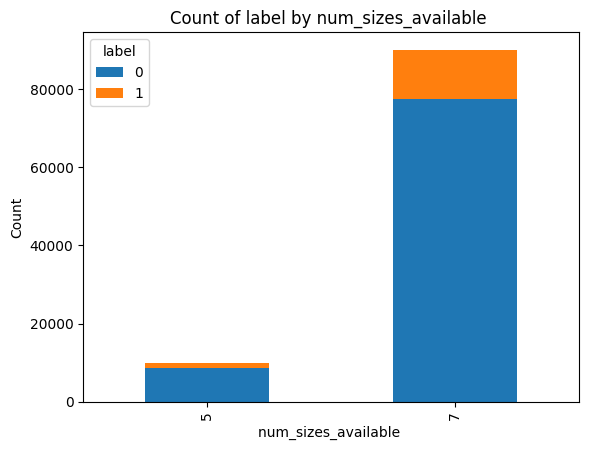

In [19]:
# Perform the groupby operation and calculate the value counts
grouped_counts = df_nor.groupby('num_sizes_available')['label'].value_counts()

# Reset the index to make the groupby results accessible as columns
grouped_counts = grouped_counts.reset_index(name='count')

# Create a pivot table to reshape the data for plotting
pivot_table = grouped_counts.pivot_table(index=['num_sizes_available'], columns='label', values='count', fill_value=0)

# Plot the bar graph
pivot_table.plot(kind='bar', stacked=True)

# Set the labels and title
plt.xlabel('num_sizes_available ')
plt.ylabel('Count')
plt.title('Count of label by num_sizes_available ')

# Display the plot
plt.show()


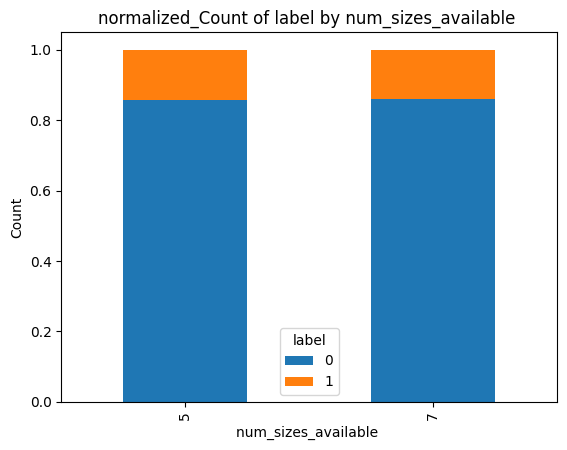

In [20]:
# Perform the groupby operation and calculate the value counts
grouped_counts = df_nor.groupby('num_sizes_available')['label'].value_counts(normalize = True)

# Reset the index to make the groupby results accessible as columns
grouped_counts = grouped_counts.reset_index(name='count')

# Create a pivot table to reshape the data for plotting
pivot_table = grouped_counts.pivot_table(index=['num_sizes_available'], columns='label', values='count', fill_value=0)

# Plot the bar graph
pivot_table.plot(kind='bar', stacked=True)

# Set the labels and title
plt.xlabel('num_sizes_available ')
plt.ylabel('Count')
plt.title('normalized_Count of label by num_sizes_available ')

# Display the plot
plt.show()



Despite the bias towards certain sizes in the available stores, the analysis reveals that the offer acceptance ratio is the same across the different available sizes. This implies that the size of the product does not significantly affect the likelihood of accepting the offer.

### countries vs offers 

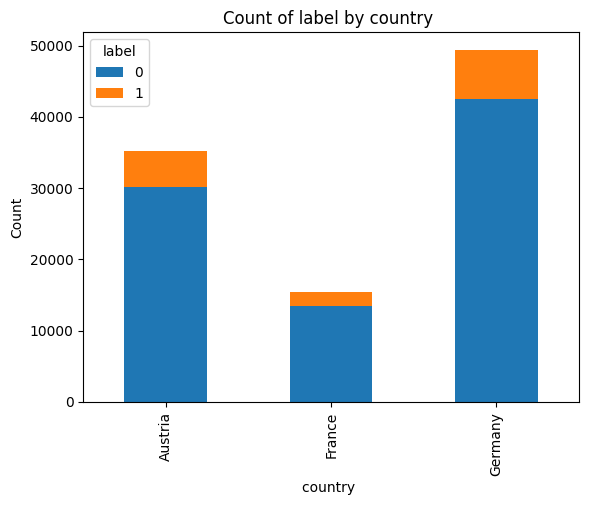

In [21]:
# Perform the groupby operation and calculate the value counts
grouped_counts = df_nor.groupby('country')['label'].value_counts()

# Reset the index to make the groupby results accessible as columns
grouped_counts = grouped_counts.reset_index(name='count')

# Create a pivot table to reshape the data for plotting
pivot_table = grouped_counts.pivot_table(index=['country'], columns='label', values='count', fill_value=0)

# Plot the bar graph
pivot_table.plot(kind='bar', stacked=True)

# Set the labels and title
plt.xlabel('country ')
plt.ylabel('Count')
plt.title('Count of label by country ')

# Display the plot
plt.show()


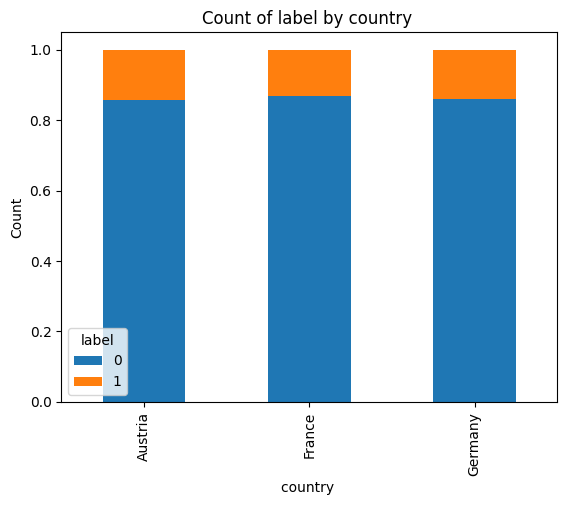

In [22]:
# Perform the groupby operation and calculate the value counts
grouped_counts = df_nor.groupby('country')['label'].value_counts(normalize =True)

# Reset the index to make the groupby results accessible as columns
grouped_counts = grouped_counts.reset_index(name='count')

# Create a pivot table to reshape the data for plotting
pivot_table = grouped_counts.pivot_table(index=['country'], columns='label', values='count', fill_value=0)

# Plot the bar graph
pivot_table.plot(kind='bar', stacked=True)

# Set the labels and title
plt.xlabel('country ')
plt.ylabel('Count')
plt.title('Count of label by country ')

# Display the plot
plt.show()


### the same as gender and size 

## ProductGroup vs Offer

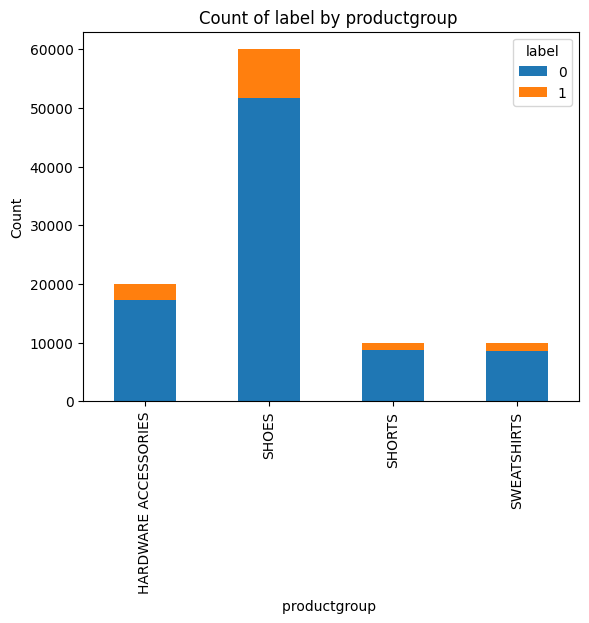

In [23]:
# Perform the groupby operation and calculate the value counts
grouped_counts = df_nor.groupby('productgroup')['label'].value_counts()

# Reset the index to make the groupby results accessible as columns
grouped_counts = grouped_counts.reset_index(name='count')

# Create a pivot table to reshape the data for plotting
pivot_table = grouped_counts.pivot_table(index=['productgroup'], columns='label', values='count', fill_value=0)

# Plot the bar graph
pivot_table.plot(kind='bar', stacked=True)

# Set the labels and title
plt.xlabel('productgroup ')
plt.ylabel('Count')
plt.title('Count of label by productgroup ')

# Display the plot
plt.show()


## Style vs offers 

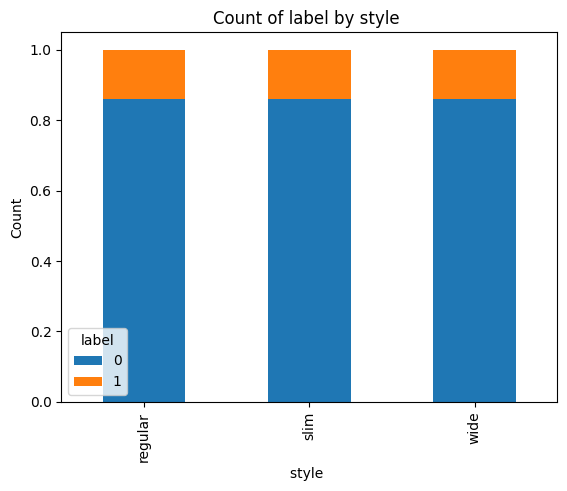

In [24]:
# Perform the groupby operation and calculate the value counts
grouped_counts = df_nor.groupby('style')['label'].value_counts(normalize = True)

# Reset the index to make the groupby results accessible as columns
grouped_counts = grouped_counts.reset_index(name='count')

# Create a pivot table to reshape the data for plotting
pivot_table = grouped_counts.pivot_table(index=['style'], columns='label', values='count', fill_value=0)

# Plot the bar graph
pivot_table.plot(kind='bar', stacked=True)

# Set the labels and title
plt.xlabel('style ')
plt.ylabel('Count')
plt.title('Count of label by style ')

# Display the plot
plt.show()


## Discount vs Offers

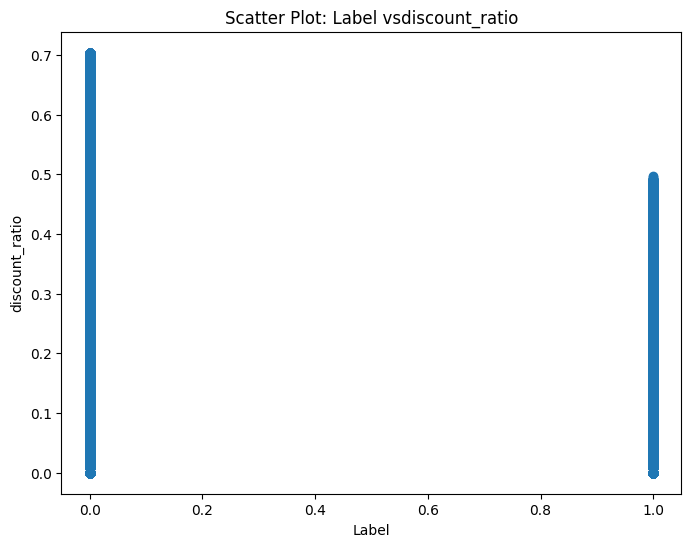

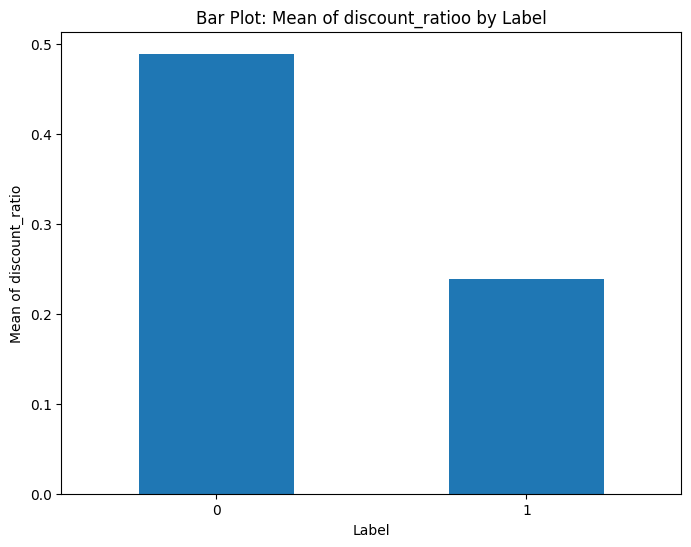

In [25]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_nor['label'], df_nor['discount_ratio'])
plt.xlabel('Label')
plt.ylabel('discount_ratio')
plt.title('Scatter Plot: Label vsdiscount_ratio')
plt.show()

# Bar plot
plt.figure(figsize=(8, 6))
df_nor.groupby('label')['discount_ratio'].mean().plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Mean of discount_ratio')
plt.title('Bar Plot: Mean of discount_ratioo by Label')
plt.xticks(rotation=0)
plt.show()


<Figure size 800x600 with 0 Axes>

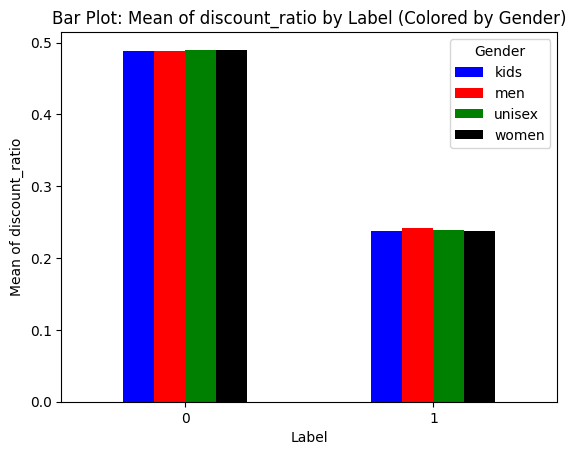

In [26]:
# Group the data by 'label' and 'gender' and calculate the mean of 'complement_ratio'
grouped_data = df_nor.groupby(['label', 'gender'])['discount_ratio'].mean().unstack()

# Define colors for each gender category
colors = ['blue', 'red','green','black']

# Bar plot with colored bars for each gender
plt.figure(figsize=(8, 6))
grouped_data.plot(kind='bar', color=colors)
plt.xlabel('Label')
plt.ylabel('Mean of discount_ratio')
plt.title('Bar Plot: Mean of discount_ratio by Label (Colored by Gender)')
plt.xticks(rotation=0)

plt.legend(title='Gender')
plt.show()


In [33]:
# find the discount num for each product 
df_discount = df_nor.groupby('productgroup',as_index = False)['discount_ratio'].value_counts()
df_discount


productgroup  discount_ratio  count
0      HARDWARE ACCESSORIES        0.000000    298
1      HARDWARE ACCESSORIES        0.506329    228
2      HARDWARE ACCESSORIES        0.689655    166
3      HARDWARE ACCESSORIES        0.667904    164
4      HARDWARE ACCESSORIES        0.678514    152
...                     ...             ...    ...
10883           SWEATSHIRTS        0.140140      1
10884           SWEATSHIRTS        0.140252      1
10885           SWEATSHIRTS        0.141381      1
10886           SWEATSHIRTS        0.141486      1
10887           SWEATSHIRTS        0.143003      1

[10888 rows x 3 columns]

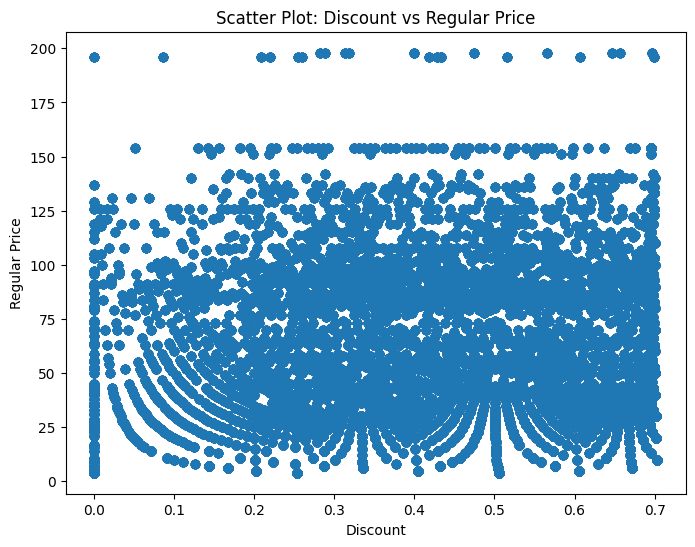

In [153]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is the DataFrame containing the 'discount' and 'regular_price' features

# Create a scatter plot of discount vs regular price
plt.figure(figsize=(8, 6))
plt.scatter(df_nor['discount_ratio'], df['regular_price'])
plt.xlabel('Discount')
plt.ylabel('Regular Price')
plt.title('Scatter Plot: Discount vs Regular Price')
plt.show()


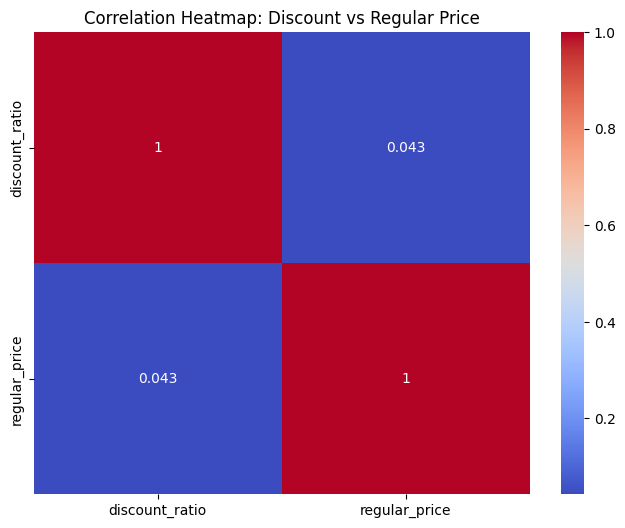

In [151]:
# Calculate the correlation matrix
correlation_matrix = df_nor[['discount_ratio', 'regular_price']].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Discount vs Regular Price')
plt.show()

## Sales vs Labels 

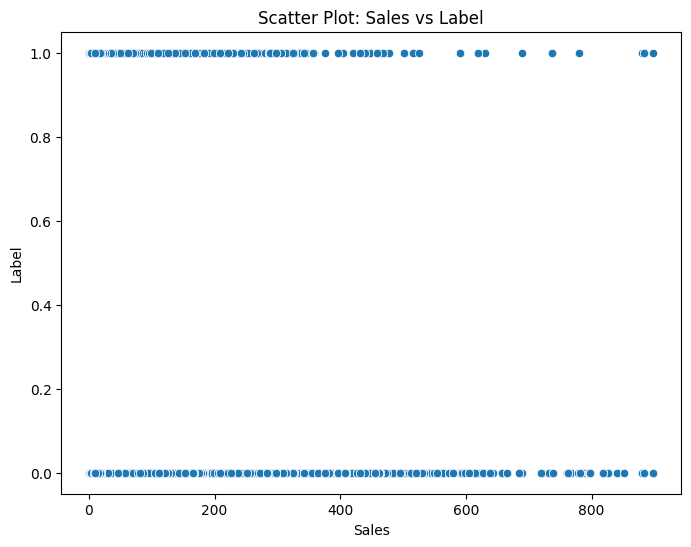

Correlation Coefficient: -0.11665050234058004


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is the DataFrame containing the 'sales' and 'label' features

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_nor, x='sales', y='label')
plt.xlabel('Sales')
plt.ylabel('Label')
plt.title('Scatter Plot: Sales vs Label')
plt.show()

# Calculate correlation coefficient
correlation = df_nor['sales'].corr(df_nor['label'])
print(f"Correlation Coefficient: {correlation}")


In [37]:
# g = sns.FacetGrid(df_nor, col="country", margin_titles=True, col_wrap=3)
# g.map(plt.scatter, 'regular_price', 'discount_ratio', alpha=.7)
# g.add_legend();

# Conclusion:

Based on the analysis conducted, the following recommendations can be made to achieve the target:

1. Increase the number of promotions: The analysis indicates that promotions have a positive impact on offer acceptance. Therefore, increasing the frequency and intensity of promotions may lead to higher acceptance rates.

2. Focus on months with high offer acceptance: The months of 1, 2, 3, 6, 7, 8, 9, and 12 show a higher acceptance rate. Allocating more resources and efforts towards promotions during these months may yield better results.

However, it is important to note that the analysis was limited due to the lack of connection with the customer. The provided data description was not sufficient to extract deeper insights. It is recommended to gather additional customer-related data to gain a more comprehensive understanding of their preferences and behaviors.


By obtaining more relevant data and enhancing the analysis, it will be possible to uncover more actionable insights and make more accurate recommendations to improve offer acceptance and achieve the desired targets.

# Model Selection

In [40]:
# Extract numerical|Categorical features
numeric_features = df_nor.select_dtypes('number').columns.tolist()
categorical_features = df_nor.select_dtypes('object').columns.tolist()

In [44]:
# Perform categorical encoding using one-hot encoding
df_encoded = pd.get_dummies(df_nor, columns=categorical_features)

In [47]:
df_encoded.head()

sales  regular_price  current_price  promo1  promo2   cost  label  \
0     28           5.95           3.95       0       0  13.29      0   
1     28           5.95           3.95       0       0   2.29      0   
2     28           5.95           3.95       0       0   1.70      0   
3     28           5.95           3.95       0       0   9.00      0   
4     28           5.95           3.95       0       0   9.60      0   

   main_color_intensity_sum  num_sizes_available  profit_margin  ...  \
0                       697                    7          -9.34  ...   
1                       697                    7           1.66  ...   
2                       697                    7           2.25  ...   
3                       613                    7          -5.05  ...   
4                       613                    7          -5.65  ...   

   category_RELAX CASUAL  category_RUNNING  category_TRAINING  style_regular  \
0                      0                 0                  1              0   
1                      0                 0                  1              1   
2                      0                 0                  0              1   
3                      0                 1                  0              1   
4                      1                 0                  0              1   

   style_slim  style_wide  gender_kids  gender_men  gender_unisex  \
0           1           0            0           0              0   
1           0           0            0           0              0   
2           0           0            0           0              0   
3           0           0            1           0              0   
4           0           0            0           0              0   

   gender_women  
0             1  
1             1  
2             1  
3             0  
4             1  

[5 rows x 35 columns]

In [57]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


#  Data Preprocessing
# Define the features and target variable
features = df_encoded.drop(['label'], axis=1)
target = df_encoded['label']

#  Train-Test Split
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

#  Feature Scaling
# Apply feature scaling to normalize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Model Training and Evaluation
# Define the LightGBM classifier and build the pipeline
classifier = lgb.LGBMClassifier()
#classifier = SVC()

pipeline = Pipeline([
    ('scaler', scaler),
    ('classifier', classifier)
])

# Fit the pipeline on the scaled training data
pipeline.fit(X_train_scaled, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('classifier', LGBMClassifier())])

# Model Evaluation 


In [60]:
from sklearn.metrics import classification_report
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.87      0.99      0.92     17189
           1       0.43      0.06      0.11      2811

    accuracy                           0.86     20000
   macro avg       0.65      0.53      0.52     20000
weighted avg       0.81      0.86      0.81     20000

